In [1]:
import pandas as pd
import numpy as np
import glob
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
import math

In [2]:
def sMAPE(a, b):
    #a verdadero
    #b prediccion
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(100 * np.abs(a-b) / (np.abs(a))).item()

In [3]:
def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [4]:
def arima_loop(dataset):

    # split into train and test sets
    print('Separating into train and test')
    train = dataset.iloc[:33600]
    test = dataset.iloc[33600:]
    y_test = test['energy(kWh/hh)'].to_list()
    
    # Create Model
    print('Creating model')
    arima_model = ARIMA(train,order = (2,0,0)).fit()

    #Predict and save results
    print('Prediciting and saving results')
    ARIMA_prediction = arima_model.predict(start=33600, end =35087,typ= 'levels')
    y_pred = ARIMA_prediction.to_list()
    
    #Metrics
    print('Calculating metrics')
    mape_i = sMAPE(y_test,y_pred)
    rmsle_i = rmsle(y_test,y_pred)

    return mape_i, rmsle_i

In [32]:
all_files[107]

'/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/affluent_std/MAC000087.csv'

In [48]:
# load the dataset
path = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou"
all_files = glob.glob(path + "/*.csv")

i = 0
mape_t = []
rmsle_t = []
for filename in all_files:
    df = pd.read_csv(filename)
    df.set_index("tstp", inplace = True) 
    mape_i,rmsle_i = arima_loop(df)
    mape_t.append(mape_i)
    rmsle_t.append(rmsle_i)
    i = i + 1
    print('filename number ' + str(i) + ' of ' + str(len(all_files)))

Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 1 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 2 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 3 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 4 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 5 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 6 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 7 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 8 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 9 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 10 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 11 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 12 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 13 of 14
Separating into train and test
Creating model


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Prediciting and saving results
Calculating metrics
filename number 14 of 14


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


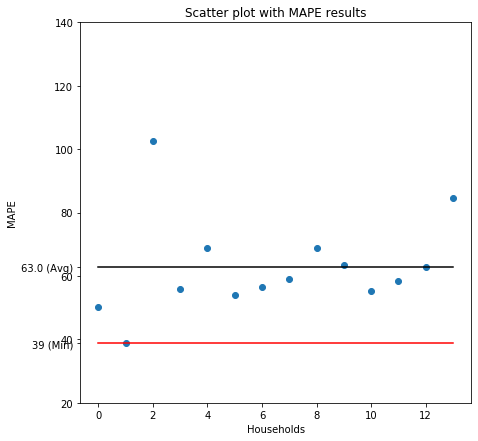

In [49]:
plt.figure(figsize = (7,7))
plt.scatter(range(len(mape_t)),mape_t)
plt.plot(range(len(mape_t)),[min(mape_t)]*len(mape_t),color = 'red')
plt.plot(range(len(mape_t)),[np.average(mape_t)]*len(mape_t),color = 'black')
plt.yticks([min(mape_t),20,40,60,np.average(mape_t),80,100,120,140],[str(round(min(mape_t)))+' (Min)','20','40','60',str(round(np.average(mape_t)))+' (Avg)','80','100','120','140'])
plt.title('Scatter plot with MAPE results',fontsize = 12)
plt.xlabel('Households')
plt.ylabel('MAPE')
plt.savefig('/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/plots/3_arima/MAPE_comfortable_tou')
plt.show()

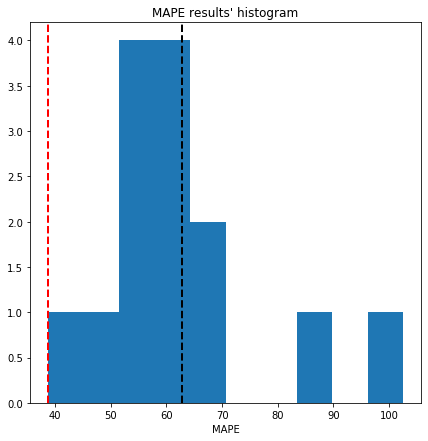

In [50]:
plt.figure(figsize = (7,7))
plt.hist(mape_t)
plt.axvline(x=min(mape_t), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=np.average(mape_t), color='black', linestyle='dashed', linewidth=2)
plt.title("MAPE results' histogram",fontsize = 12)
plt.xlabel('MAPE')
plt.savefig('/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/plots/3_arima/MAPE_1_comfortable_tou')
plt.show()

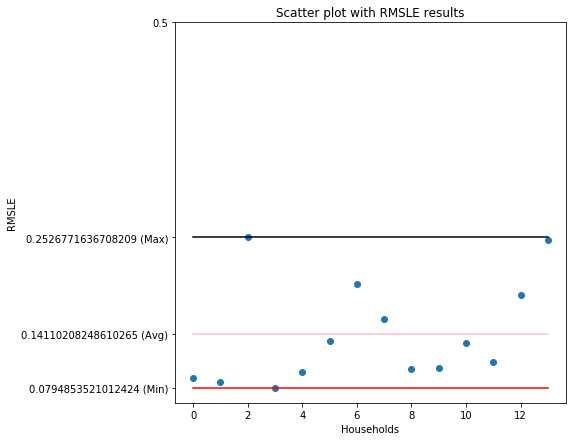

In [51]:
plt.figure(figsize = (7,7))
plt.scatter(range(len(rmsle_t)),rmsle_t)
plt.plot(range(len(rmsle_t)),[min(rmsle_t)]*len(rmsle_t),color = 'red')
plt.plot(range(len(rmsle_t)),[np.average(rmsle_t)]*len(rmsle_t),color = 'pink')
plt.plot(range(len(rmsle_t)),[max(rmsle_t)]*len(rmsle_t),color = 'black')
plt.yticks([min(rmsle_t),np.average(rmsle_t),max(rmsle_t),0.5],[str(min(rmsle_t))+' (Min)',str(np.average(rmsle_t)) + ' (Avg)',str(max(rmsle_t))+' (Max)','0.5'])
plt.title('Scatter plot with RMSLE results',fontsize = 12)
plt.xlabel('Households')
plt.ylabel('RMSLE')
plt.savefig('/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/plots/3_arima/RMSLE_comfortable_tou')
plt.show()

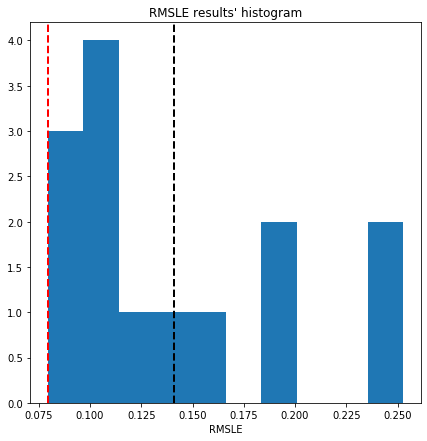

In [52]:
plt.figure(figsize = (7,7))
plt.hist(rmsle_t)
plt.axvline(x=min(rmsle_t), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=np.average(rmsle_t), color='black', linestyle='dashed', linewidth=2)
plt.title("RMSLE results' histogram",fontsize = 12)
plt.xlabel('RMSLE')
plt.savefig('/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/plots/3_arima/RMSLE_1_comfortable_tou')
plt.show()